# Generating Bode Plots in Python

## Big Ideas:

- you have some transfer function $G(s)$ you want to analyze
- evaluate $G(s)$ at $s = j \omega$
    - $\omega$ is a vector of frequencies
    - $\omega$ typically spans a large range
- find the magnitude and phase of $G(j \omega)$
- plot magnitude and phase vs. frequency
    - usually with a logarithmic axis for frequency, using the `semilogx` command
- it is usually helpful to also use a logarithmic scale for magnitude as well
    - decibels are used for historic reasons

## Steps:

- create a frequency vector and ultimately an $s$ vector:
    - `f = np.logspace(-2,3,1000)` (Hz)
    - `w = 2*np.pi*f`
    - `s = 1.0j*w`
- evaluate $G(s)$ at $s = j \omega$
- find the dB magnitude and phase and plot them

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
plt.rcParams['font.size'] = 14
#import pylab_util as PU
import os
import control

### Create the frequency and s vectors

In [30]:
f = np.logspace(-2,4,1000)

In [31]:
f.min()

0.01

In [32]:
f.max()

10000.0

In [33]:
len(f)

1000

In [35]:
w = 2*np.pi*f
s = 1.0j*w

## Example 1

$$G(s) = \frac{p_1 p_2}{(s+p_1)(s+p_2)}$$

### Without the Python-Control Module

In [36]:
p1 = 1.0*2*np.pi
p2 = 100.0*2*np.pi

Substitute `s` into the transfer function:

In [37]:
Gjw = p1*p2/((s+p1)*(s+p2))

$G(j\omega)$ is a vector of complex numbers:

In [38]:
Gjw

array([  9.99899000e-01 -1.00989900e-02j,
         9.99896168e-01 -1.02395938e-02j,
         9.99893256e-01 -1.03821544e-02j,
         9.99890263e-01 -1.05266990e-02j,
         9.99887186e-01 -1.06732550e-02j,
         9.99884022e-01 -1.08218505e-02j,
         9.99880770e-01 -1.09725139e-02j,
         9.99877427e-01 -1.11252738e-02j,
         9.99873990e-01 -1.12801593e-02j,
         9.99870456e-01 -1.14372001e-02j,
         9.99866824e-01 -1.15964261e-02j,
         9.99863089e-01 -1.17578676e-02j,
         9.99859250e-01 -1.19215554e-02j,
         9.99855303e-01 -1.20875206e-02j,
         9.99851246e-01 -1.22557950e-02j,
         9.99847075e-01 -1.24264107e-02j,
         9.99842787e-01 -1.25994000e-02j,
         9.99838379e-01 -1.27747960e-02j,
         9.99833847e-01 -1.29526321e-02j,
         9.99829188e-01 -1.31329422e-02j,
         9.99824398e-01 -1.33157606e-02j,
         9.99819474e-01 -1.35011222e-02j,
         9.99814412e-01 -1.36890622e-02j,
         9.99809209e-01 -1.3879616

Find the dB magnitude and phase:

In [39]:
db_mag = 20*np.log10(np.abs(Gjw))

In [40]:
phase = np.arctan2(np.imag(Gjw),np.real(Gjw))*180/np.pi

Generate the Bode plot:

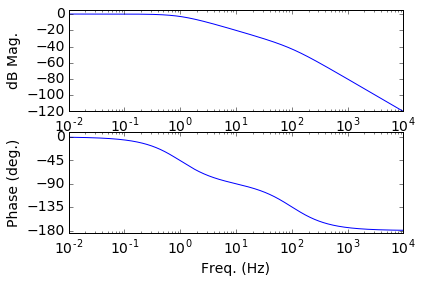

In [41]:
plt.figure()
plt.subplot(211)
plt.semilogx(f,db_mag)
plt.ylabel('dB Mag.')
plt.ylim([-120,5])
plt.subplot(212)
plt.semilogx(f,phase)
plt.xlabel('Freq. (Hz)')
plt.ylabel('Phase (deg.)')
plt.ylim([-185,10])
out = plt.yticks(np.arange(-180,5,45))

### With Python-Control

In [42]:
part1 = control.TransferFunction(p1,[1,p1])
part2 = control.TransferFunction(p2,[1,p2])
G = part1*part2
G


        3948
--------------------
s^2 + 634.6 s + 3948

In [43]:
p1*p2

3947.8417604357433

In [13]:
20*np.log10(1/(p1*p2))

-71.927194734324601

In [44]:
p1+p2

634.6017160251382

In [45]:
Gjw = G(s)
Gjw

array([  9.99899000e-01 -1.00989900e-02j,
         9.99896168e-01 -1.02395938e-02j,
         9.99893256e-01 -1.03821544e-02j,
         9.99890263e-01 -1.05266990e-02j,
         9.99887186e-01 -1.06732550e-02j,
         9.99884022e-01 -1.08218505e-02j,
         9.99880770e-01 -1.09725139e-02j,
         9.99877427e-01 -1.11252738e-02j,
         9.99873990e-01 -1.12801593e-02j,
         9.99870456e-01 -1.14372001e-02j,
         9.99866824e-01 -1.15964261e-02j,
         9.99863089e-01 -1.17578676e-02j,
         9.99859250e-01 -1.19215554e-02j,
         9.99855303e-01 -1.20875206e-02j,
         9.99851246e-01 -1.22557950e-02j,
         9.99847075e-01 -1.24264107e-02j,
         9.99842787e-01 -1.25994000e-02j,
         9.99838379e-01 -1.27747960e-02j,
         9.99833847e-01 -1.29526321e-02j,
         9.99829188e-01 -1.31329422e-02j,
         9.99824398e-01 -1.33157606e-02j,
         9.99819474e-01 -1.35011222e-02j,
         9.99814412e-01 -1.36890622e-02j,
         9.99809209e-01 -1.3879616

## Example 2

In [46]:
z = 2*2*np.pi
wn = 200*2*np.pi
zeta = 0.1

In [47]:
G2 = control.TransferFunction([1,z],[1,2*zeta*wn,wn**2,0])
G2


          s + 12.57
-----------------------------
s^3 + 251.3 s^2 + 1.579e+06 s

In [48]:
Gjw2 = G2(s)

In [49]:
db2 = 20*np.log10(np.abs(Gjw2))
phase2 = np.angle(Gjw2,1)

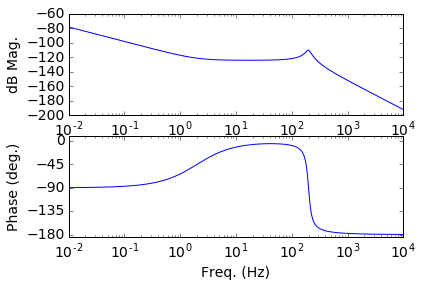

In [50]:
plt.figure()
plt.subplot(211)
plt.semilogx(f,db2)
plt.ylabel('dB Mag.')
#plt.ylim([-120,5])
plt.subplot(212)
plt.semilogx(f,phase2)
plt.xlabel('Freq. (Hz)')
plt.ylabel('Phase (deg.)')
plt.ylim([-185,10])
out = plt.yticks(np.arange(-180,5,45))

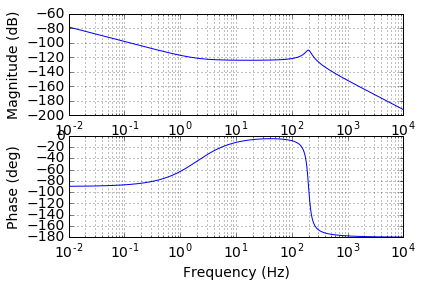

In [51]:
out = control.bode_plot(G2,w,dB=1,Hz=1,deg=1)

Note that the second input to `control.bode_plot` is $\omega$ in radians/second regardless of requesting Hz on the $x$-axis of the plot.  Also note that compared to my previous examples, the second input is $\omega$, not $s=j \omega$, i.e. the code will multiply by $j$ for you.

### My bode_utils module

In [24]:
import bode_utils

In [25]:
help(bode_utils.bode_plot)

Help on function bode_plot in module bode_utils:

bode_plot(freq, dB_mag, phase, fig=None, fignum=1, clear=True, xlim=None, label=None, fmt='-', grid=True, figsize=None, **kwargs)
    This function plots a very nice Bode plot.  freq is a vector in
    Hz.  dB_mag and phase are vectors with the same length as freq.



In [26]:
help(bode_utils.bode_plot2)

Help on function bode_plot2 in module bode_utils:

bode_plot2(freq, Gjw, *args, **kwargs)
    calculate dB_mag and phase from Gjw and then plot a Bode plot
    using the bode_plot function, passing in
    bode_plot(freq,dB_mag,phase,*args,**kwargs).



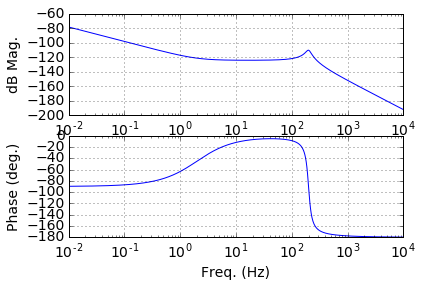

In [52]:
out = bode_utils.bode_plot2(f,Gjw2)